In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

import random
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np

# Задание 1. Теорема Бернули

In [2]:
items = np.array([random.randint(0, 1) for i in range(1850)])

sum_1850 = sum(items)
sum_170 = sum(items[:170:])
mean_1850 = sum_1850 / 1850
mean_170 = sum_170 / 170

In [3]:
print ("Сумма 1850 значений:", sum_1850) 
print ("Отн. частота 1850:", mean_1850)
print ("Сумма 170 значений:", sum_170) 
print ("Отн. частота 170:", mean_170) 

Сумма 1850 значений: 910
Отн. частота 1850: 0.4918918918918919
Сумма 170 значений: 79
Отн. частота 170: 0.4647058823529412


# 2. Закон больших чисел в форме Чебышова

## 2.1. Испытание практически достоверного события 

In [4]:
# Сгенерируем 7 выборок объема 1000 с распределением Коши
x = np.array([sts.cauchy.rvs(loc=0, scale=1, size=1000) for i in range(7)])
x

array([[  8.64900042,   0.22812732,  -0.27721007, ...,  20.43229759,
          1.29563683,  -0.38787018],
       [  0.56355324,   0.22343426,   1.87193875, ..., -11.81174182,
          0.74962003,   0.87869143],
       [ -1.11002341,   1.57195435,  -0.58211264, ...,  -0.36738098,
          1.64274256,  -3.32469615],
       ...,
       [ -0.7011179 ,   5.51306224,  -3.98325085, ...,   0.35725287,
         -2.36852168,  -1.75610583],
       [ -0.34547613,  -0.88898324,  -9.66328399, ...,  -1.503532  ,
         -1.7263201 ,  -0.4197975 ],
       [ -0.65309736,   1.00238307,  -0.51547711, ..., -36.67586258,
          0.19883987,   0.3109996 ]])

In [5]:
# Определим среднее значение на всех 7 выборках
np.mean(x, axis = 1)

array([ 1.12186682, -0.80611548,  1.87572457,  1.17043259, -3.34581187,
        1.79517935, -3.94714453])

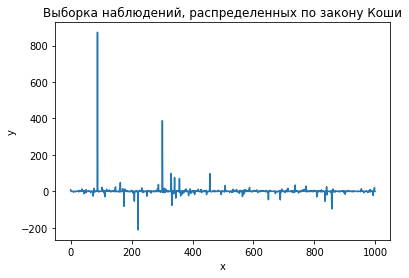

In [6]:
plt.plot(range(len(x[0])),x[0])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Выборка наблюдений, распределенных по закону Коши')
plt.show()

## Задача 2.2. Сжатие распределения с ростом числа слагаемых

In [7]:
N640 = np.array([np.random.sample(640) for i in range(20)])
N640

array([[0.82504092, 0.72474382, 0.29761867, ..., 0.08774127, 0.11626645,
        0.61524118],
       [0.62594619, 0.84896992, 0.36627853, ..., 0.30475528, 0.90019124,
        0.10911298],
       [0.74265765, 0.50690801, 0.46343639, ..., 0.61441218, 0.03922491,
        0.91354372],
       ...,
       [0.05028616, 0.03662444, 0.40337257, ..., 0.26084025, 0.24683363,
        0.79919598],
       [0.68874603, 0.54591575, 0.79484415, ..., 0.57042663, 0.22498382,
        0.07506633],
       [0.49142263, 0.87946977, 0.33747878, ..., 0.17412184, 0.54772824,
        0.94466378]])

In [8]:
N10 = N640.transpose()[:10:].transpose()
xs1 = np.mean(N10, axis = 1)

N40 = N640.transpose()[:40:].transpose()
xs2 = np.mean(N40, axis = 1)

N160 = N640.transpose()[:160:].transpose()
xs3 = np.mean(N160, axis = 1)

xs4 = np.mean(N640, axis = 1)

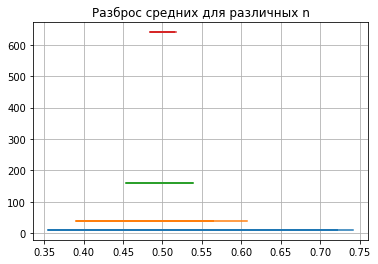

In [9]:
plt.plot(xs1, [10]*20)
plt.plot(xs2, [40]*20)
plt.plot(xs3, [160]*20)
plt.plot(xs4, [640]*20)
plt.grid(True)
plt.title('Разброс средних для различных n')
plt.show()

# Задание 3. Усиленный закон больших чисел 

In [10]:
coin = []
size = 500
coin.append([random.randint(0, 1) for i in range(size)])
coin.append([random.randint(0, 1) for i in range(size)])
coin.append([random.randint(0, 1) for i in range(size)])
coin.append([0 for i in range(size)])
coin.append([0 for i in range(size)])
coin.append([0 for i in range(size)])
np.array(coin[:3:])

array([[1, 0, 1, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 0]])

In [11]:
def part3_prep():
    for j in range(3, 6):
        coin[j][0] = coin[j-3][0]
        for k in range(1, size):
            coin[j][k] = ((k-1) * coin[j][k-1] + coin[j-3][k]) / k

part3_prep()
np.array(coin[3:6:])

array([[1.        , 0.        , 0.5       , ..., 0.49899396, 0.49799197,
        0.498998  ],
       [0.        , 0.        , 0.5       , ..., 0.54929577, 0.5502008 ,
        0.5511022 ],
       [1.        , 0.        , 0.        , ..., 0.49698189, 0.49799197,
        0.49699399]])

In [12]:
def part3(n):
    plt.plot(range(len(coin[3][:n:])),coin[3][:n:])
    plt.plot(range(len(coin[4][:n:])),coin[4][:n:])
    plt.plot(range(len(coin[5][:n:])),coin[5][:n:])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Относитеьная частота выпадания герба при изменении n = '+str(n))
    plt.show()

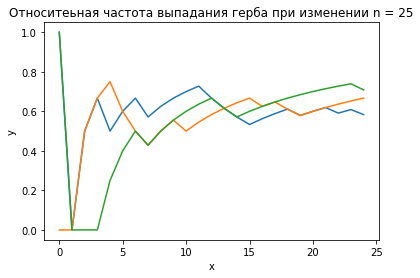

In [13]:
part3(25)

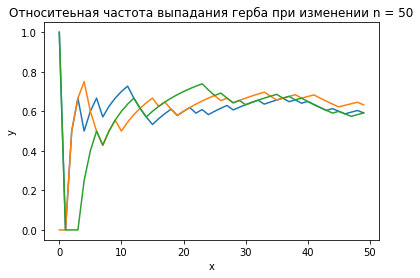

In [14]:
part3(50)

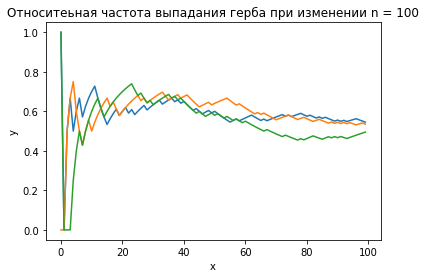

In [15]:
part3(100)

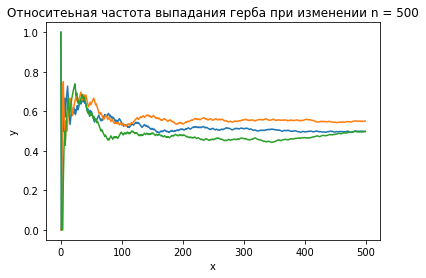

In [16]:
part3(500)

## Б) Эксперемент со случайными числами. 

In [17]:
coin = []
coin.append([random.random() for i in range(size)])
coin.append([random.random() for i in range(size)])
coin.append([random.random() for i in range(size)])
coin.append([0 for i in range(size)])
coin.append([0 for i in range(size)])
coin.append([0 for i in range(size)])
np.array(coin[:3:])

array([[0.51019105, 0.71636833, 0.67845197, ..., 0.8004454 , 0.4435301 ,
        0.05106271],
       [0.21610199, 0.029751  , 0.8617007 , ..., 0.11589314, 0.89414673,
        0.65374085],
       [0.72174499, 0.21100549, 0.16964317, ..., 0.14675065, 0.6969098 ,
        0.20982052]])

In [18]:
part3_prep()
np.array(coin[3:6:])

array([[0.51019105, 0.71636833, 0.69741015, ..., 0.47683212, 0.47676525,
        0.47591214],
       [0.21610199, 0.029751  , 0.44572585, ..., 0.49636997, 0.49716872,
        0.49748249],
       [0.72174499, 0.21100549, 0.19032433, ..., 0.50450022, 0.50488658,
        0.50429527]])

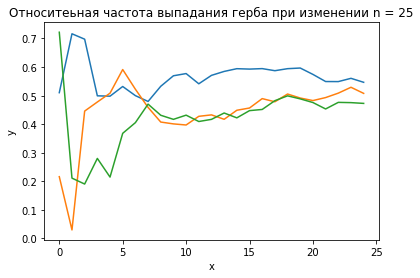

In [19]:
part3(25)

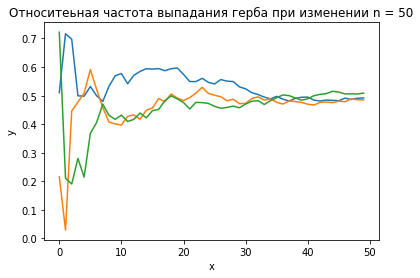

In [20]:
part3(50)

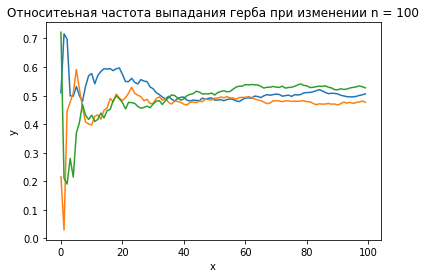

In [21]:
part3(100)

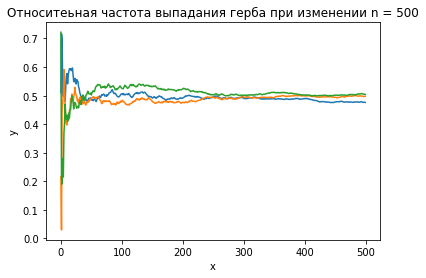

In [22]:
part3(500)

## В) Пример невыполнения закона. 


In [23]:
import math
for j in range(0, 2):
    for i in range(0, size):
        coin[j][i] = math.tan(coin[j][i] * math.pi)

np.array(coin[:3:])               

array([[-31.22358377,  -1.23726645,  -1.59281755, ...,  -0.72440679,
          5.5775469 ,   0.16180861],
       [  0.80685099,   0.09373865,  -0.46405461, ...,   0.38107846,
         -0.34537412,  -1.90687357],
       [  0.72174499,   0.21100549,   0.16964317, ...,   0.14675065,
          0.6969098 ,   0.20982052]])

In [24]:
part3_prep()
np.array(coin[3:6:])

array([[-31.22358377,  -1.23726645,  -1.415042  , ...,  50.32645239,
         50.23659515,  50.13624488],
       [  0.80685099,   0.09373865,  -0.18515798, ...,  -0.32935011,
         -0.32938229,  -0.33254359],
       [  0.72174499,   0.21100549,   0.19032433, ...,   0.50450022,
          0.50488658,   0.50429527]])

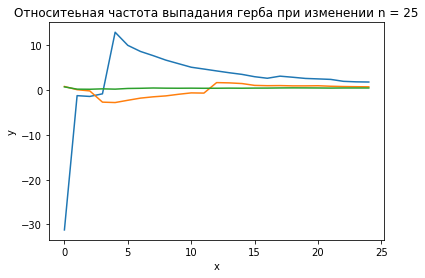

In [25]:
part3(25)

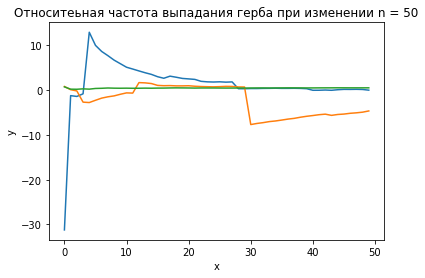

In [26]:
part3(50)

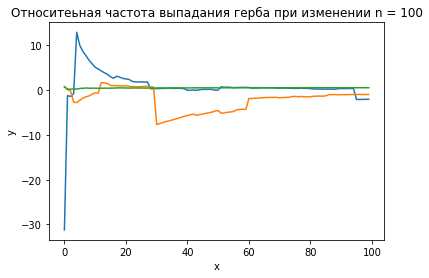

In [27]:
part3(100)

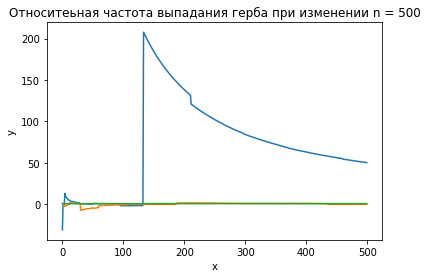

In [28]:
part3(500)

# Задача 4. Теорема Гливенко – основная теорема статистики 


Проиллюстрируем теорему Гливенко на примерах наблюдения над 
случайной величиной, распределённой по равномерному закону на отрезке 
[0,1]. 
Сравним функцию эмпирического распределения для выборок объёмами 10,  
40, 160, 640 с функцией теоретического распределения. 
Сделаем таблицу в первый столбец запишем случайную величину, во второй 
– эмпирическую функцию распределения. А в третий – теоретическую. А 
затем выведем графики для каждого n. 


In [29]:
mainSample = np.random.sample(640)

def part4(n):
    sample = mainSample[:n:]

    x = np.linspace(0,1,50)
    cdf = sts.uniform.cdf(x)
    plt.plot(x, cdf, label='theoretical CDF')

    # для построения ECDF используем библиотеку statsmodels
    from statsmodels.distributions.empirical_distribution import ECDF
    ecdf = ECDF(sample)
    plt.step(ecdf.x, ecdf.y, label='ECDF')
    plt.title('Функции эмпирического и теоретического распределения для n='+str(n))
    plt.legend(loc='upper left')

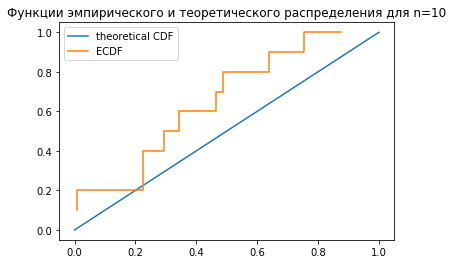

In [30]:
part4(10)

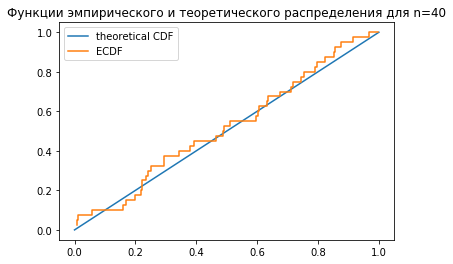

In [31]:
part4(40)

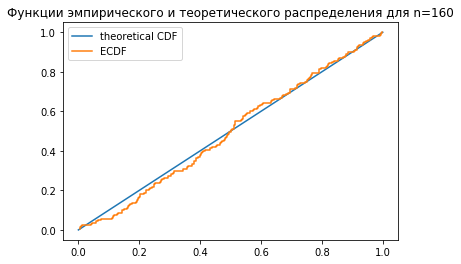

In [32]:
part4(160)

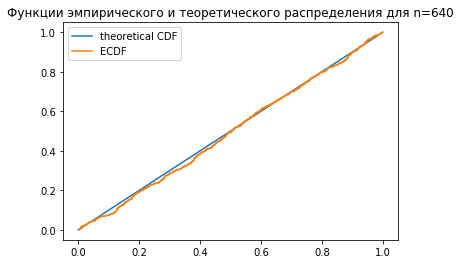

In [33]:
part4(640)

# Задача 5. Центральная предельная теорема 


## 5.2)  Одинаково распределённые слагаемые. 




In [34]:
a =  0.5
b = 0.5
y = [sts.beta.rvs(a, b, size=500) for i in range(6)]

def part52(m, title):
    plt.hist(m, 16, normed=True)
    plt.title(title)
    plt.grid(True)

    x_axis = np.arange(0, np.max(m), 0.001)
    plt.plot(x_axis, sts.norm.pdf(x_axis,np.mean(m),np.std(m) ))

C:\Users\D4K\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


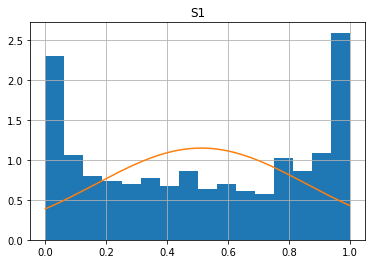

In [35]:
part52(y[1], 'S1')

C:\Users\D4K\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


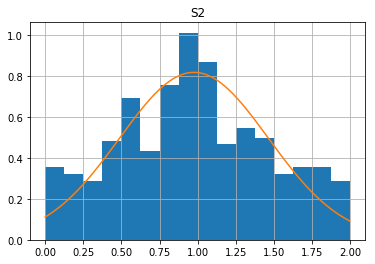

In [36]:
S2 = y[0]+y[1]
part52(S2, 'S2')

C:\Users\D4K\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


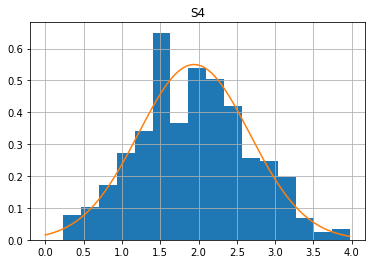

In [37]:
S4 = S2 + y[2]+y[3]
part52(S4, 'S4')

C:\Users\D4K\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


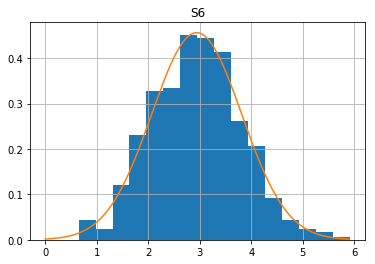

In [38]:
S6 = S4 + y[4]+y[5]
part52(S6, 'S6')

## 5.3)  Различно распределенные слагаемые 

In [39]:
a = [1, 0.5, 1, 1, 2, 2]
b = [0.5, 1, 1, 2, 1, 2]
y[0] =  sts.beta.rvs(a[0], b[0], size=500)
y[1] =  sts.beta.rvs(a[1], b[1], size=500)
y[2] =  sts.beta.rvs(a[2], b[2], size=500)
y[3] =  sts.beta.rvs(a[3], b[3], size=500)
y[4] =  sts.beta.rvs(a[4], b[4], size=500)
y[5] =  sts.beta.rvs(a[5], b[5], size=500)

C:\Users\D4K\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


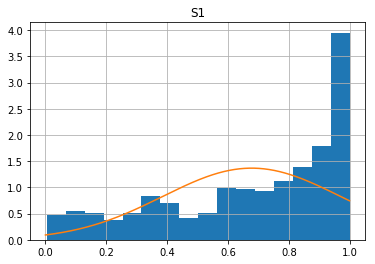

In [40]:
part52(y[0], 'S1')

C:\Users\D4K\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


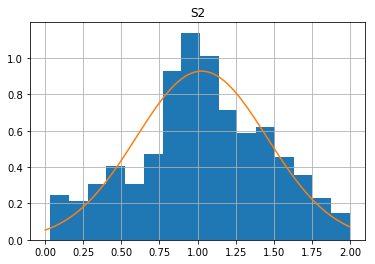

In [41]:
S2 = y[0]+y[1]
part52(S2, 'S2')

C:\Users\D4K\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


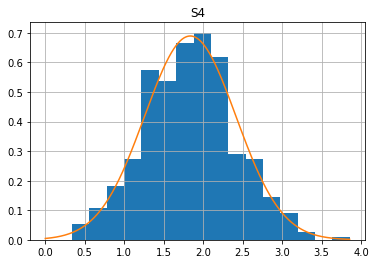

In [42]:
S4 = S2 + y[2]+y[3]
part52(S4, 'S4')

C:\Users\D4K\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


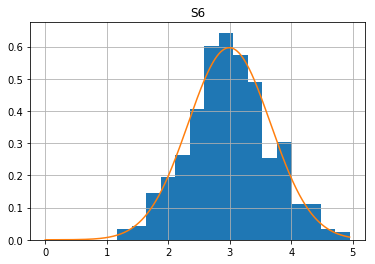

In [43]:
S6 = S4 + y[4]+y[5]
part52(S6, 'S6')